[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=best_v8_50epoch_0.354map.pt conf=0.25 source='firebird2.jpg' save=True

/content
2023-04-17 13:51:27.176836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 13:51:28.857564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs
image 1/1 /content/firebird2.jpg: 640x480 1 firebird, 82.9ms
Speed: 0.9ms pre-process, 82.9ms inference, 116.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


/content


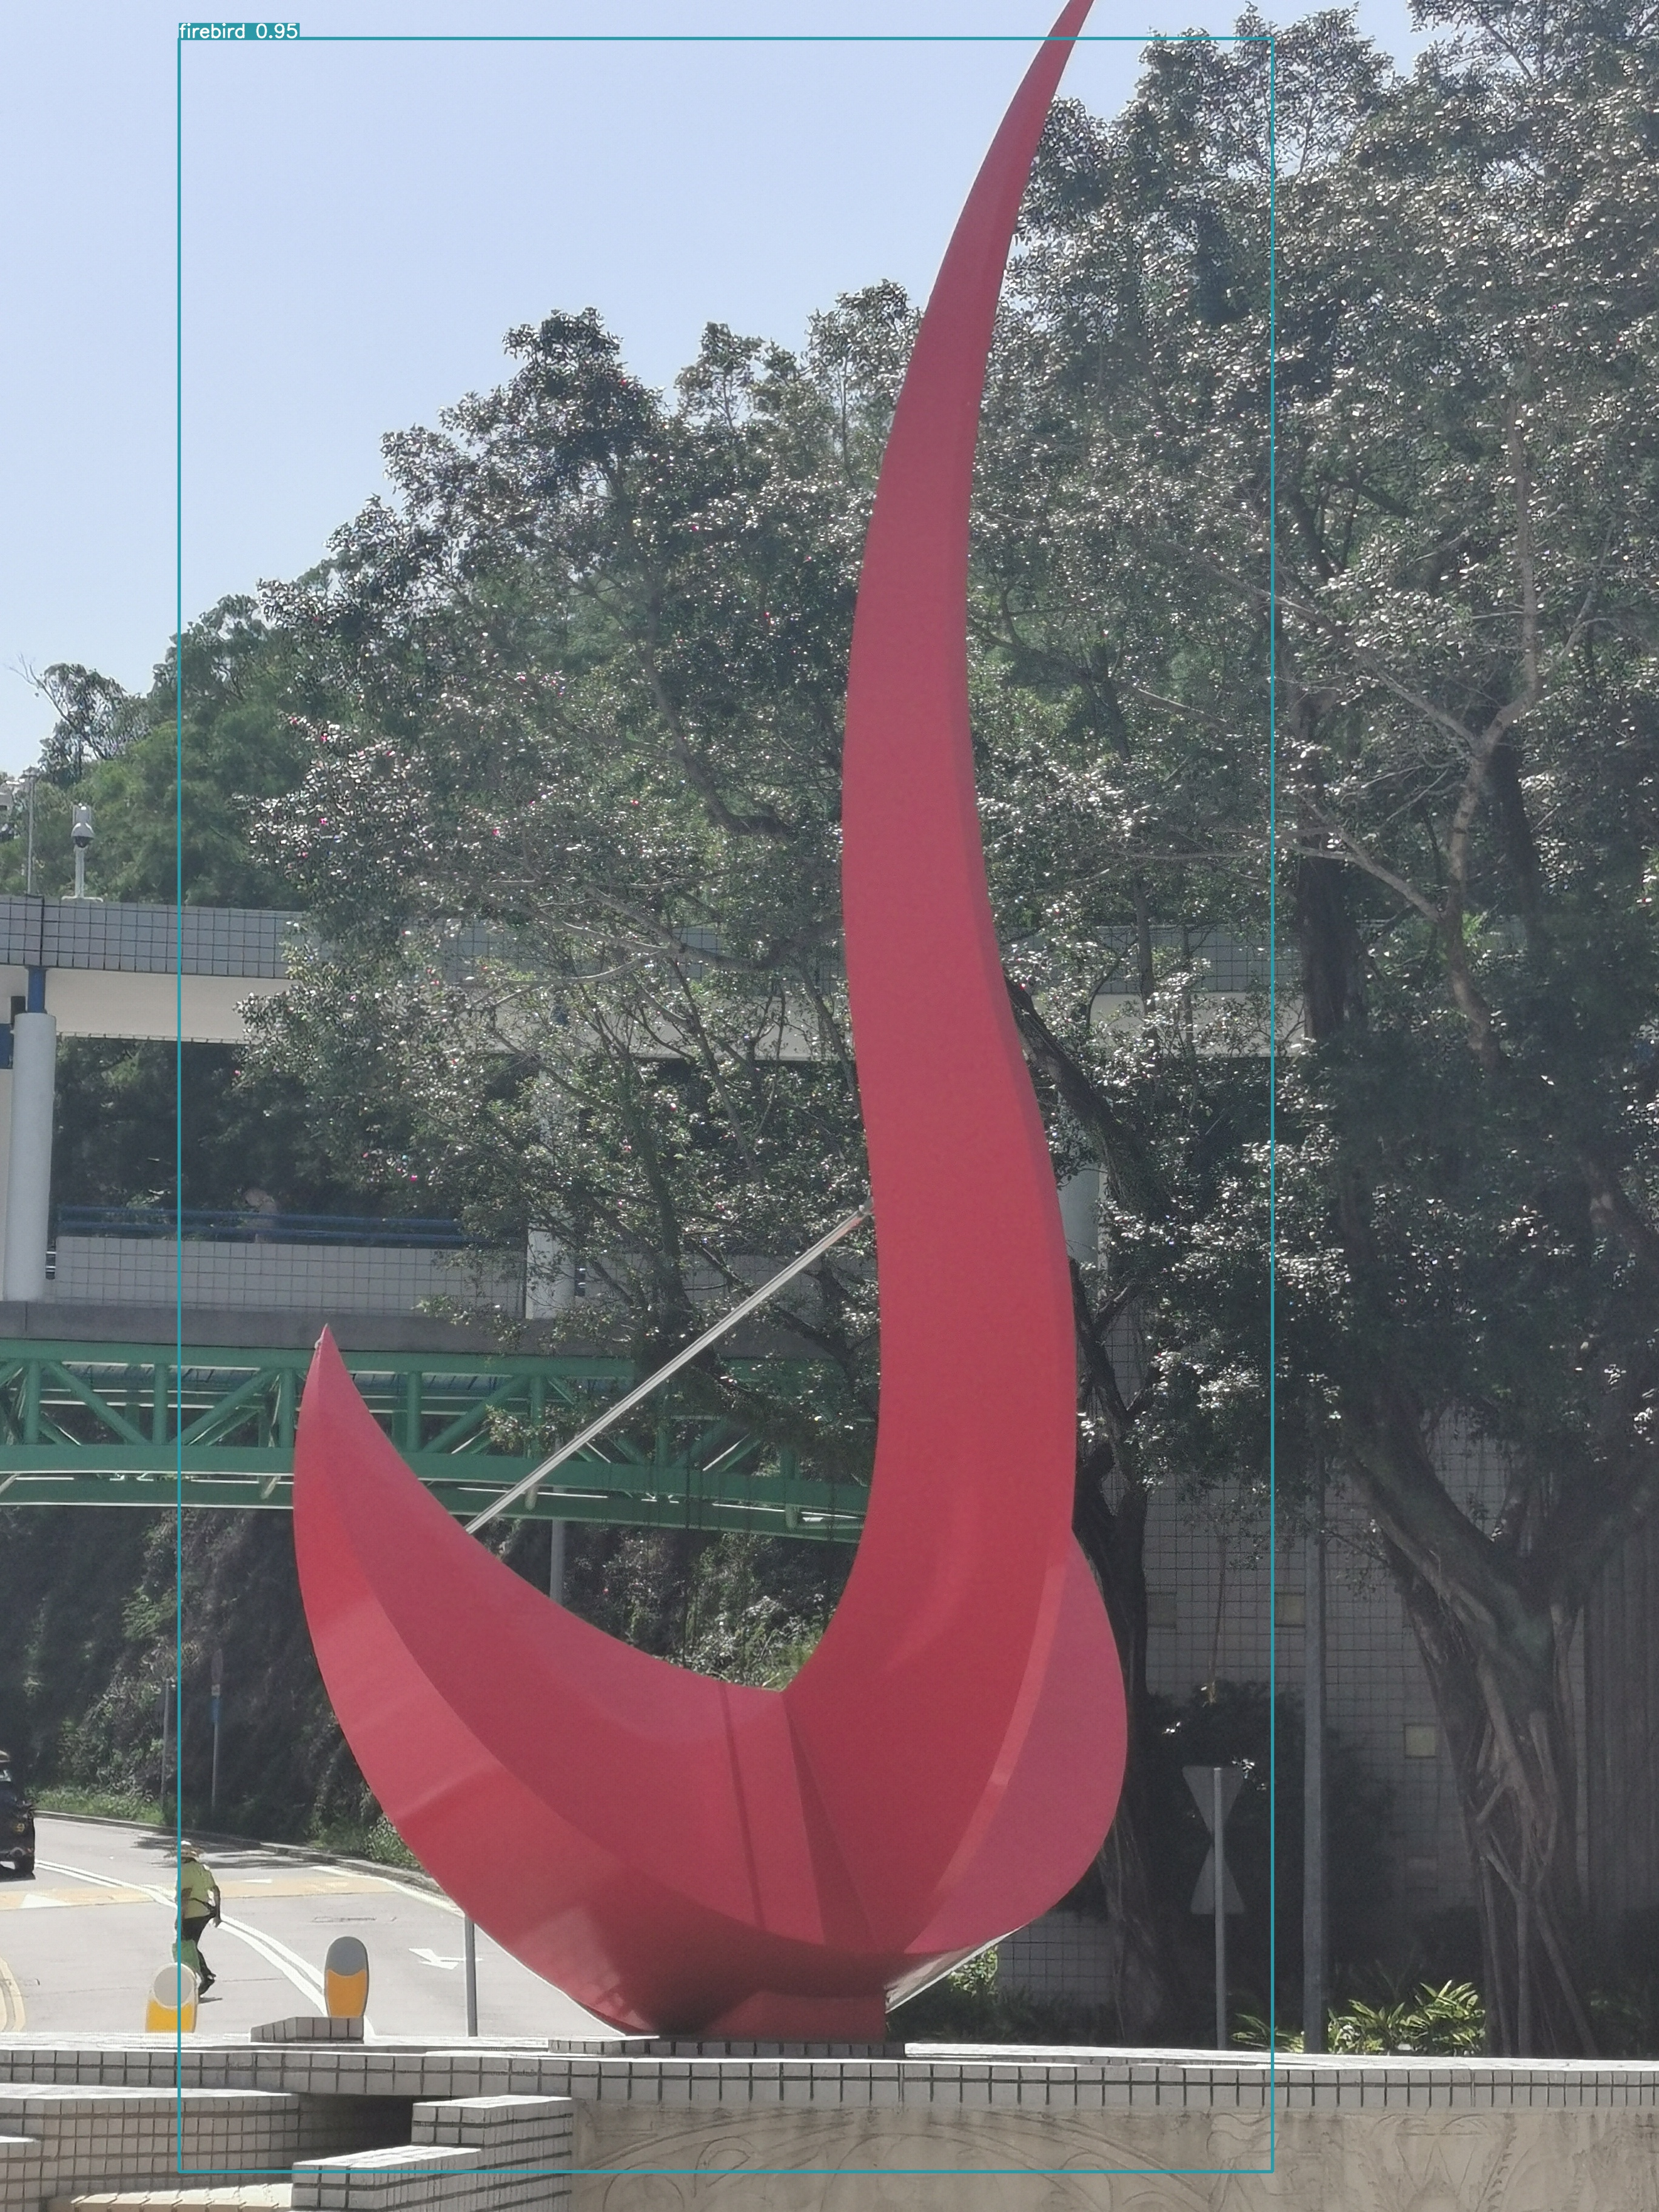

In [ ]:
%cd {HOME}
from IPython.display import display, Image
Image(filename='runs/detect/predict6/firebird2.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=best_v8_50epoch_0.354map.pt conf=0.25 source='HKUST_Campus.mp4' save=True show='false'

串流輸出內容已截斷至最後 5000 行。
video 1/1 (9123/14120) /content/HKUST_Campus.mp4: 384x640 6.9ms
video 1/1 (9124/14120) /content/HKUST_Campus.mp4: 384x640 6.8ms
video 1/1 (9125/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 6.1ms
video 1/1 (9126/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 1 tv, 6.6ms
video 1/1 (9127/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 1 tv, 6.3ms
video 1/1 (9128/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 6.2ms
video 1/1 (9129/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 6.4ms
video 1/1 (9130/14120) /content/HKUST_Campus.mp4: 384x640 6.9ms
video 1/1 (9131/14120) /content/HKUST_Campus.mp4: 384x640 6.7ms
video 1/1 (9132/14120) /content/HKUST_Campus.mp4: 384x640 1 laptop, 6.1ms
video 1/1 (9133/14120) /content/HKUST_Campus.mp4: 384x640 1 laptop, 7.0ms
video 1/1 (9134/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 1 laptop, 6.5ms
video 1/1 (9135/14120) /content/HKUST_Campus.mp4: 384x640 1 keyboard, 6.4ms
video 1/1 (9136/14120